In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import cv2
from PIL import Image

In [2]:
import zipfile
import os

# Path to your OCR ZIP file
zip_file_path = '/content/OCR_Task_Digits_Dataset.zip'

# Directory to extract the ZIP file contents
extracted_folder_path = '/content/extracted_ocr_data'

# Extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)
    print(f"Extracted files: {zip_ref.namelist()}")

Extracted files: ['dataset/', 'dataset/0/', 'dataset/0/0_1.png', 'dataset/0/0_10.png', 'dataset/0/0_100.png', 'dataset/0/0_101.png', 'dataset/0/0_102.png', 'dataset/0/0_103.png', 'dataset/0/0_104.png', 'dataset/0/0_105.png', 'dataset/0/0_11.png', 'dataset/0/0_12.png', 'dataset/0/0_13.png', 'dataset/0/0_14.png', 'dataset/0/0_15.png', 'dataset/0/0_16.png', 'dataset/0/0_17.png', 'dataset/0/0_18.png', 'dataset/0/0_19.png', 'dataset/0/0_2.png', 'dataset/0/0_20.png', 'dataset/0/0_21.png', 'dataset/0/0_22.png', 'dataset/0/0_23.png', 'dataset/0/0_24.png', 'dataset/0/0_25.png', 'dataset/0/0_26.png', 'dataset/0/0_27.png', 'dataset/0/0_28.png', 'dataset/0/0_29.png', 'dataset/0/0_3.png', 'dataset/0/0_30.png', 'dataset/0/0_31.png', 'dataset/0/0_32.png', 'dataset/0/0_33.png', 'dataset/0/0_34.png', 'dataset/0/0_35.png', 'dataset/0/0_36.png', 'dataset/0/0_37.png', 'dataset/0/0_38.png', 'dataset/0/0_39.png', 'dataset/0/0_4.png', 'dataset/0/0_40.png', 'dataset/0/0_41.png', 'dataset/0/0_42.png', 'dataset

In [3]:
# List the contents of the extracted folder
extracted_files = os.listdir(extracted_folder_path)
print("Extracted files:", extracted_files)


Extracted files: ['dataset']


In [4]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array

# Define the path to the extracted dataset
dataset_dir = '/content/extracted_ocr_data/dataset'

# Initialize the data and labels lists
data = []
labels = []

# Define image size (resize all images to this size)
img_size = 28

# Loop through the dataset and load the images
for label in os.listdir(dataset_dir):
    label_path = os.path.join(dataset_dir, label)
    if os.path.isdir(label_path):
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)

            # Load and preprocess the image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            img = cv2.resize(img, (img_size, img_size))  # Resize image to a fixed size
            img = img_to_array(img)  # Convert to array
            img = img / 255.0  # Normalize the image to [0, 1]

            # Append the image and label
            data.append(img)
            labels.append(int(label))  # The folder name corresponds to the label

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [5]:
data.shape

(885, 28, 28, 1)

In [6]:
data

array([[[[0.16078432],
         [0.16470589],
         [0.16078432],
         ...,
         [0.14901961],
         [0.14901961],
         [0.14117648]],

        [[0.16862746],
         [0.15686275],
         [0.14509805],
         ...,
         [0.14509805],
         [0.14901961],
         [0.15294118]],

        [[0.15686275],
         [0.16078432],
         [0.15686275],
         ...,
         [0.15686275],
         [0.15294118],
         [0.14901961]],

        ...,

        [[0.17254902],
         [0.1764706 ],
         [0.18039216],
         ...,
         [0.18039216],
         [0.18431373],
         [0.2       ]],

        [[0.19607843],
         [0.1882353 ],
         [0.18039216],
         ...,
         [0.1764706 ],
         [0.1764706 ],
         [0.19215687]],

        [[0.18039216],
         [0.1882353 ],
         [0.19607843],
         ...,
         [0.16078432],
         [0.16078432],
         [0.17254902]]],


       [[[0.1254902 ],
         [0.11764706],
         [0.12

In [7]:
data.shape

(885, 28, 28, 1)

In [8]:
data = data.reshape(-1, img_size, img_size, 1)


In [9]:
labels = to_categorical(labels, num_classes=10)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 422,026 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

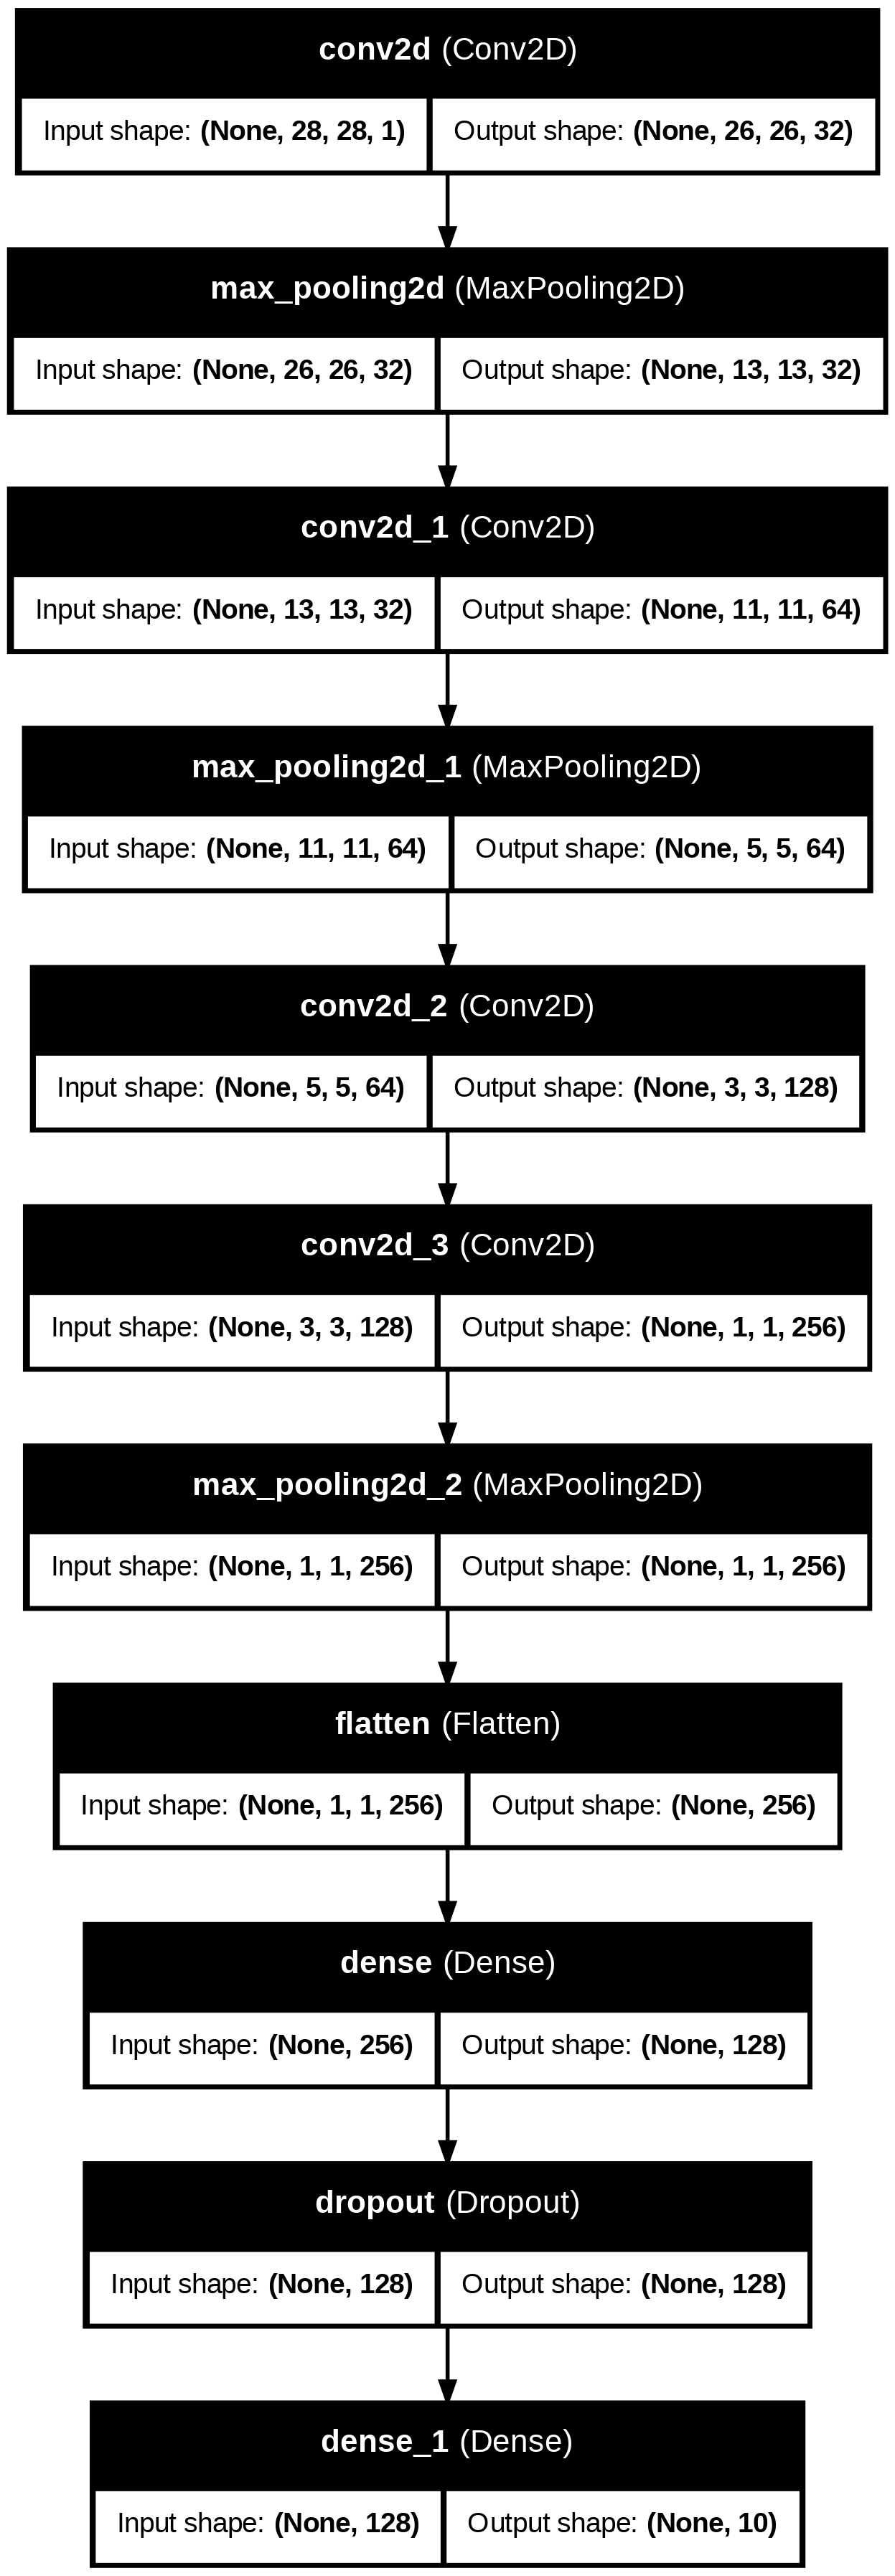

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [12]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=32, batch_size=64)


Epoch 1/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.1030 - loss: 2.3004 - val_accuracy: 0.1638 - val_loss: 2.2762
Epoch 2/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.1327 - loss: 2.2822 - val_accuracy: 0.1977 - val_loss: 2.2524
Epoch 3/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.2027 - loss: 2.2489 - val_accuracy: 0.2881 - val_loss: 2.1562
Epoch 4/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.2504 - loss: 2.1656 - val_accuracy: 0.3616 - val_loss: 1.9836
Epoch 5/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.3257 - loss: 1.9296 - val_accuracy: 0.5254 - val_loss: 1.6198
Epoch 6/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4683 - loss: 1.5635 - val_accuracy: 0.5480 - val_loss: 1.2860
Epoch 7/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5319 - loss: 1.3494 - val_accuracy: 0.7514 - val_loss: 0.9972
Epoch 8/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6342 - loss: 1.0932 - val_accuracy: 0.8079 

In [13]:
model.save('digit_classifier_model.h5')


In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


6/6 - 0s - 15ms/step - accuracy: 0.9605 - loss: 0.2736
Test Accuracy: 96.05%


In [23]:
def predict_digit(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = img_to_array(img)
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    # Predict the digit
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)

    return predicted_digit

# Example usage
image_path = '/content/extracted_ocr_data/dataset/0/0_10.png'
predicted_digit = predict_digit(image_path)
print(f"Predicted digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted digit: 0


In [25]:
from joblib import dump, load

dump(model, 'digit_classifier_model.joblib')

['digit_classifier_model.joblib']

In [26]:
model.load_weights("/content/digit_classifier_model.h5")

In [27]:
ls

digit_classifier_model.h5      extracted_ocr_data/          sample_data/
digit_classifier_model.joblib  OCR_Task_Digits_Dataset.zip


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


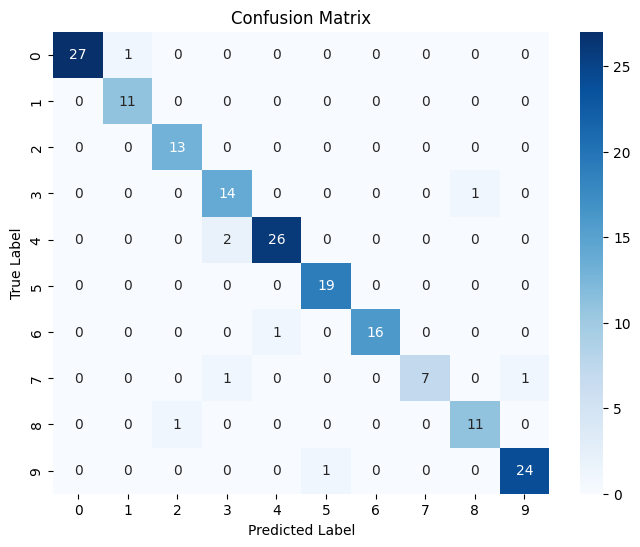

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)  # if y_test is one-hot encoded

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


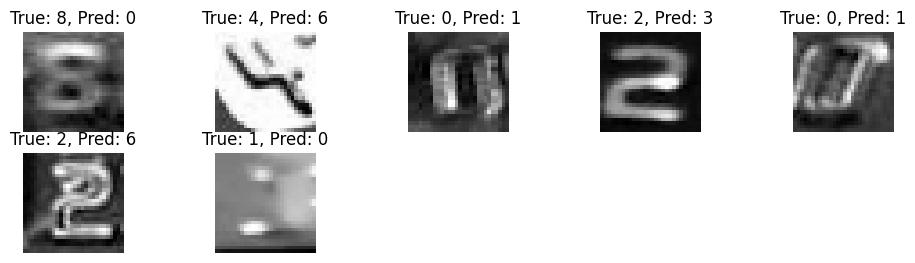

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have the following variables:
# X_test: Your test images
# y_test: The true labels (either categorical or one-hot encoded)
# model: The trained model

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# If the model outputs probabilities, we need to convert them to predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to class labels as well
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# 2. Identify misclassified samples
misclassified_indexes = np.where(y_pred_classes != y_test_classes)[0]

# 3. Get the wrong predictions (images and labels)
wrong_images = X_test[misclassified_indexes]
wrong_true_labels = y_test_classes[misclassified_indexes]
wrong_pred_labels = y_pred_classes[misclassified_indexes]

# 4. Optional: Visualize some of the misclassified images
num_to_show = 20  # You can change this number based on how many wrong samples you want to visualize

plt.figure(figsize=(12, 6))
for i in range(min(num_to_show, len(misclassified_indexes))):
    plt.subplot(4, 5, i+1)
    plt.imshow(wrong_images[i], cmap='gray')
    plt.title(f'True: {wrong_true_labels[i]}, Pred: {wrong_pred_labels[i]}')
    plt.axis('off')
plt.show()